In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
X.shape[0], X.shape[1]

(1797, 64)

In [ ]:
import matplotlib.pyplot as plt

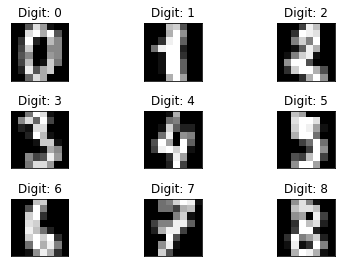

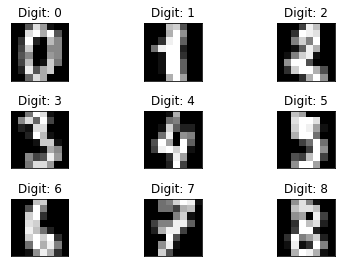

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X[i].reshape(8,8), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y[i]))
  plt.xticks([])
  plt.yticks([])
fig



---

**PREPROCESSING**

---



In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

MinMaxScaler skaluje składowe wektora danych do zadanego zakresu - domyślnie 0,1 obustronnie domkniętego.

In [ ]:
import numpy as np

In [ ]:
np.max(X)

16.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxScaler(copy=False).fit_transform(X)

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [ ]:
np.max(X)

1.0

In [ ]:
X = X.reshape(X.shape[0], 8, 8, 1).astype('float32')

Funkcja to_categorical jest jedną z wielu dostępnych metod, która pozwala w sposób zautomatyzowany zmienić format odpowiedzi z całkowitoliczbowych indeksów na kodowanie One Hot Encoding.

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y = to_categorical(y)

In [ ]:
y.shape[0], y.shape[1], y

(1797, 10, array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [ ]:
X.dtype, X.shape, X.max(), y.shape

(dtype('float32'), (1797, 8, 8, 1), 1.0, (1797, 10))



---

**TWORZENIE MODELU**

---



In [ ]:
from tensorflow.keras import models

In [ ]:
model_1 = models.Sequential()

Dodajemy pierwszą warstwę powstającej sieci - wejściową.

In [ ]:
from tensorflow.keras import layers

In [ ]:
model_1.add(layers.InputLayer(input_shape=(8, 8, 1), name='input'))

Dodajemy drugą warstwę - konwolucji z filtrem 3 na 3

In [ ]:
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', name='convolutional'))

Dodajemy trzecią warstwę - max_pooling z oknem 2 na 2

In [ ]:
model_1.add(layers.MaxPooling2D((2, 2), name='max_pooling'))

Dodajemy czwartą warstwę Flatten Layer (warstwa spłaszczająca). Zadaniem tej warstwy jest rozwinięcie odpowiedzi warstw poprzednich w formie tensora (np. 10x10x3) w wektor jednowymiarowy (dla przykładu 300) na potrzeby przekazania jej do perceptronu wielowarstwowego.

In [ ]:
model_1.add(layers.Flatten(name='flatten'))

Dodajemy warstwy szóstą i siódmą jako perceptron wielowarstwowy z jedną warstwą ukrytą, połączeniem pełnym i przetwarzający odpowiedzi na wyjściu funkcją softmax.

In [ ]:
model_1.add(layers.Dense(100, activation='relu', name='hidden'))
model_1.add(layers.Dense(10, activation='softmax', name='output'))



---

**KOMPILOWANIE MODELU**

---



Na koniec musimy wybrać funkcję straty i optymalizator. 

OPTYMALIZATOR
rmsprop - Root Mean Squared Propagation

FUNKCJA STRATY
Pracujemy nad problemem klasyfikacji, a sieć zwraca wartości prawdopodobieństwa (na końcu sieci znajduje się warstwa jednej jednostki z funkcją aktywacji softmax). Najlepiej będzie skorzystać z funkcji straty categorical_crossentropy (entropii krzyżowej dla danych kategorialnych), powszechnie stosowanej w uczeniu maszynowym jako funkcja straty.

Nie jest to jedyna opcja. Można w tym miejscu użyć np. funkcji średniego błędu kwadratowego MSE (mean_squared_error).

ENTROPIA KRZYŻOWA
w przypadku modeli zwracających wartości prawdopodobieństwa. Termin entropia krzyżowa wywodzi się z teorii informacji. Jest to miara odległości między rozkładami prawdopodobieństwa a w tym przypadku rozkładem prawdziwych wartości i rozkładem przewidywanych wartości. Wskazujemy ponadto, że podczas trenowania monitorować będziemy również dokładność (accuracy).

Metryka, optymalizator i funkcja straty są definiowane za pomocą ciągów znakowych. Jest to możliwe, ponieważ są to pakiety wchodzące w skład biblioteki Keras. Gdyby jednak zaszła potrzeba skonfigurowania parametrów optymalizatora lub przekazania samodzielnie wykonanej funkcji straty lub funkcji metryki, będzie można to zrobić. W tym celu należy samodzielnie przygotowany optymalizator, lub funkcje straty czy metryki przekazać odpowiednio jako argumenty optimizer, loss i metrics.

In [ ]:
model_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolutional (Conv2D)      (None, 6, 6, 32)          320       
                                                                 
 max_pooling (MaxPooling2D)  (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 hidden (Dense)              (None, 100)               28900     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 30,230
Trainable params: 30,230
Non-trainable params: 0
_________________________________________________________________


Funkcja plot_model pozwala nam jeszcze dokładniej przyjrzeć się architekturze powstałej sieci.

In [ ]:
from tensorflow.keras.utils import plot_model

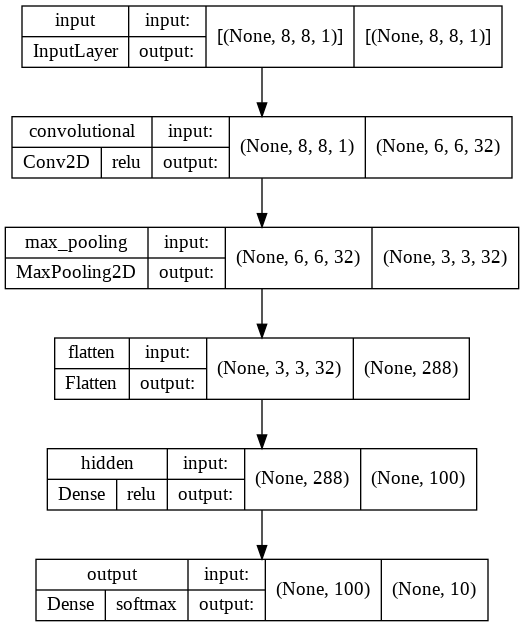

In [ ]:
plot_model(model_1, show_shapes=True, show_layer_activations=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime
import tensorflow as tf
%load_ext tensorboard

In [ ]:
val_stop = EarlyStopping(monitor='val_loss', patience=5)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = TensorBoard(logdir, histogram_freq=1)
%tensorboard --logdir logs

In [ ]:

from sklearn.model_selection import train_test_split

Zbiory uczący i testowy dzielimy 25% jako testowy oraz 75% jako uczący.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
fit_1 = model_1.fit(X_train, y_train, 
                    epochs=150, 
                    # batch_size=32,
                    callbacks=[val_stop, tb],
                    validation_data=(X_test, y_test))

Epoch 1/150
43/43 [==============================] - 1s 15ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.2543 - val_accuracy: 0.9200
Epoch 2/150
43/43 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9970 - val_loss: 0.0828 - val_accuracy: 0.9733
Epoch 3/150
43/43 [==============================] - 0s 10ms/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 4/150
43/43 [==============================] - 1s 12ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0901 - val_accuracy: 0.9689
Epoch 5/150
43/43 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.0753 - val_accuracy: 0.9778
Epoch 6/150
43/43 [==============================] - 0s 11ms/step - loss: 0.0062 - accuracy: 0.9993 - val_loss: 0.1003 - val_accuracy: 0.9711
Epoch 7/150
43/43 [==============================] - 0s 10ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9800
Epoch 8

In [ ]:
y_pred_1 = fit_1.model.predict(X_test)

NameError: ignored

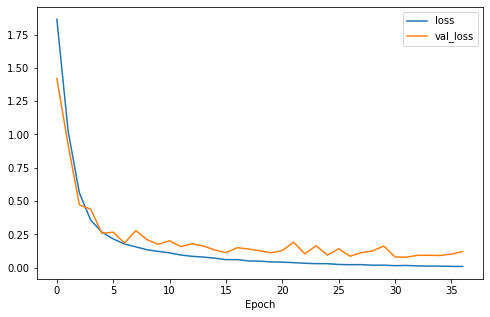

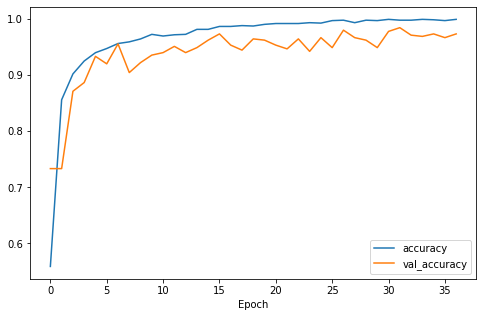

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fit_1.history['loss'], '-', label='loss')
plt.plot(fit_1.history['val_loss'], '-', label='val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(fit_1.history['accuracy'], '-', label='accuracy')
plt.plot(fit_1.history['val_accuracy'], '-', label='val_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()



---

MACIERZ POMYŁEK

---



Pozwala nam w czytelniejszy sposób spojrzeć na wyniki odpowiedzi nauczonego modelu.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  3,  1,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 43]])

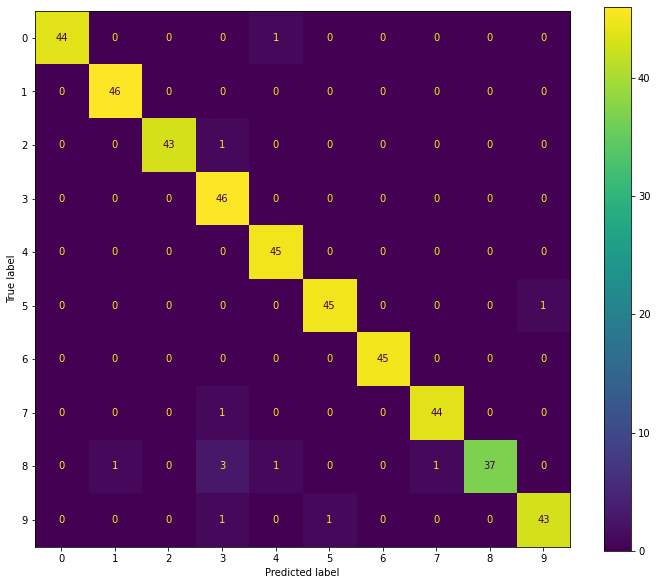

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_1, axis=1))
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12, 10))
cmp.plot(ax=ax)
cm

Oczywiście suma przypadków uwzględnionych w macierzy pomyłek pokrywa się z ilością przypadków w zbiorze testowym.

In [ ]:
len(y_test)

450

In [ ]:
cm.sum()

450